# Data Analysis
This notebook aims to answer our hypotheseis and questions when appraching this data.

Hypothesis:
Students that are within major cities such as Melbourne or Geelong, that also receive Private, non-government education are more likely to have higher academic performance within Victoria.

Questions: 
* Is there a relationship with Geolocation and academic success?  
* Is there a relationship with Geolocation and the choices of schools?
* Which school sector has best chance of success?

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps
from itertools import cycle, islice
# Import API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [47]:
# Read in csv files
school_df = pd.read_csv("Resources/Cleaned_VCE_results_by_school.csv") 
school_dis_df = pd.read_csv('Resources/Cleaned_VCE_results_by_school_with_distance.csv')



# Geolocation visulaisation
This section provides an overarching investigation into the distributuion of where Vicotrian schools are located based on geolocation. The first part of this analysis is to break down what suburbs are contained within each Geolocation as to better understand each Geolocations defintion.
 A breakdown of what percentage of schools are located in different geolocations as well as a box plot showing a count of schools per geolocation are provided to visualise the data. Heatmaps of where schools are concentrated and located based on geolocation are also provided utlising the google maps API. Within this secion there is:
* Suburbs within each Geolocation
* Counting schools in each location
* Geolocations percentage of schools
* Geolocation count of schools box plot
* Victorian school heat map
* Heat map for each geolocation's schools

### Suburbs within each geolocation
Finding what suburbs are located within each geolocation and creating a .csv containing the results.

In [3]:
# Create series for each Geolocation
inner_regional = school_df.loc[school_df["Geolocation"] == "Inner Regional"]["Suburb"]
major_cities = school_df.loc[school_df["Geolocation"] == "Major Cities"]["Suburb"]
outer_regional = school_df.loc[school_df["Geolocation"] == "Outer Regional"]["Suburb"]
remote = school_df.loc[school_df["Geolocation"] == "Remote"]["Suburb"]

In [4]:
# Drop the index for each series
inner_regional.reset_index(drop=True, inplace=True)
major_cities.reset_index(drop=True, inplace=True)
outer_regional.reset_index(drop=True, inplace=True)
remote.reset_index(drop=True, inplace=True)

In [5]:
# Create a dataframe of the series created above 
suburb_by_geolocation_df = pd.DataFrame({"Major Cities": major_cities, 
                                         "Inner Regional": inner_regional,
                                        "Outer Regional": outer_regional,
                                        "Remote": remote})

In [6]:
# Display head
suburb_by_geolocation_df.head()

,Major Cities,Inner Regional,Outer Regional,Remote
0,Fitzroy,Alexandra,Bairnsdale,Cann River
1,Elsternwick,Macedon,Portland,Mallacoota
2,Greenvale,Apollo Bay,Birchip,Murrayville
3,Melton South,Ararat,Boort,Rainbow
4,Epping,Kilmore,Bright,NaN


In [52]:
#Counting suburbs within each geolocation
suburb_by_geolocation_df.count()

Major Cities      252
Inner Regional     83
Outer Regional     39
Remote              4
dtype: int64

In [7]:
# Export this df to a csv
suburb_by_geolocation_df.to_csv("Resources/suburb_by_geolocation.csv", index=False)

### Schools within each Geolocation count
This section counted how many schools are within each geolocation. We found that areas with higher population contained more schools.

In [50]:
# Counting total schools within Victoria
print(f"There are ", school_df['School Name'].count()," within victoria")

There are  378  within victoria


In [10]:
#Count of each school in each geo location and calculate geolocation's count percentage
#groupby geolocation
geo_schools_gb = school_df.groupby(['Geolocation'])
#take the size of each geolocation and create a data frame
schools_sort_size = pd.DataFrame(geo_schools_gb.size())
#name the .size() column
schools_sort_size.columns = ['Number of Schools']
#add a column for percentage and add it to the dataframe
schools_sort_size ["Percentage"] = (100*(schools_sort_size['Number of Schools']/schools_sort_size['Number of Schools'].sum()))
#print
schools_sort_size

,Number of Schools,Percentage
Geolocation,,
Inner Regional,83,21.957672
Major Cities,252,66.666667
Outer Regional,39,10.317460
Remote,4,1.058201


### Visualisation of school within each geolocaiton


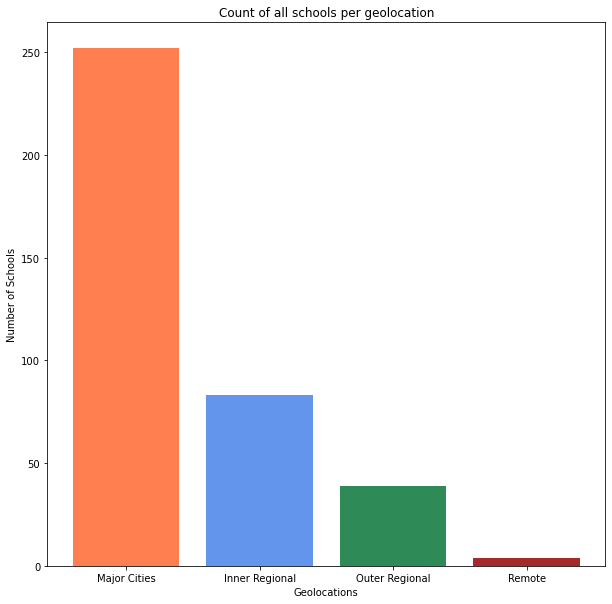

In [12]:
#Count of all schools in Victoria per Geolocation
#get rid of percentage as it doesnt need to be displayed
schools_sort_size_bar = schools_sort_size.drop(schools_sort_size.columns[1],axis=1,)
#sort values
schools_sort_size_bar = schools_sort_size_bar.sort_values('Number of Schools', ascending= False)
#define X and Y axis
x_axis = ['Major Cities','Inner Regional', 'Outer Regional', 'Remote']
y_axis = schools_sort_size_bar['Number of Schools']
#Creation and labeling of bar chart
plt.figure(figsize=(10,10))
plt.bar(x_axis,y_axis, color=['coral','cornflowerblue','seagreen','brown'],)
plt.ylabel('Number of Schools')
plt.xlabel('Geolocations')
plt.title('Count of all schools per geolocation')
plt.savefig('output/schools_count_bar.png')
plt.show()


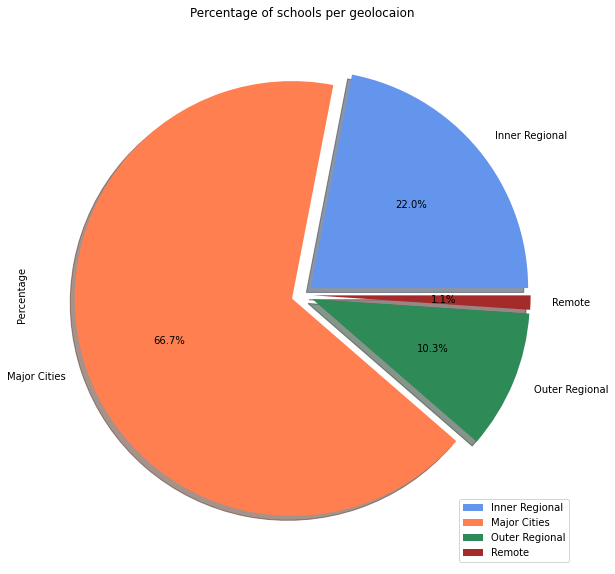

In [11]:
#Percentage of all schools in Victoria per Geolocation in a pie chart
#Creation and labeling of pie chart
schools_sort_size.plot.pie(y= 'Percentage' ,figsize=(10,10), explode=( 0.05,0.05,0.05,0.05),
        labels=("Inner Regional", "Major Cities", "Outer Regional", "Remote"),shadow= True, autopct="%1.1f%%", colors = ['cornflowerblue','coral','seagreen','brown'])
plt.title('Percentage of schools per geolocaion')
plt.savefig('output/schools_perc_pie.png')
plt.show()

### Heat map of each geolocations schools
Mapping acess to education within victoria by creating a heatamp of all schools. Then breaking down acess to education for each geolocation

In [53]:
#School location heatmap

#find school locations
locations = school_df[["Latitude", "Longitude"]].astype(float)
#print the map as a Roadmap (normal google maps style)
fig = gmaps.figure(map_type='ROADMAP')
#create heatmap based on school locations
heatmap_layer = gmaps.heatmap_layer(locations)
#add heatmap layer to the map
fig.add_layer(heatmap_layer)
#print map
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#Inner Regional Heatmap
#Take all Inner Regional schools and create a new DataFrame
Inner_Regional_data = school_df.loc[(school_df['Geolocation'] == 'Inner Regional')]
#Same mapping process as mapping all schools
locations = Inner_Regional_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#Major Cities Heatmap
#Take all major cities schools and create a new DataFrame
Major_Cities_data = school_df.loc[(school_df['Geolocation'] == 'Major Cities')]
#same mapping process as mapping all school locations
locations = Major_Cities_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
#Outer Regional Heatmap
#Take all Outer Regional schools and create a new DataFrame
Outer_Regional_data = school_df.loc[(school_df['Geolocation'] == 'Outer Regional')]
#same mapping process as mapping all school locations
locations = Outer_Regional_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
#Remote Heatmap
#Take all remote schools and create a new DataFrame
Remote_data = school_df.loc[(school_df['Geolocation'] == 'Remote')]
#same mapping process as mapping all school locations
locations = Remote_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

# Geolocation visulaisation Conclusion
When looking into this section of the data we were not surprised that geolocations that contained a higher population contained more schools. Major Cities had a significantly higher count of schools at 252, making up 66.7% of all schools within Victoria. This was also backed up through the visualisation where major cities was significantly larger in both the bar and pie plots. The heat maps also gave a similar indication as they concentrated around Melbourne and Geelong.

This then provided an answer to one of our questions when looking into this data. Which was, do students within high population areas have better access to educational resources. From this data we can conclude that, students within larger population centers do in fact have better access to educational resources within Victoria.

# Geolocation access to different schooling sectors
This section investigates access to different educational sectors based on geolocation. This is done by counting the total geolocations then plotting the count on a bar chart. Then breadking down the distribution for all geolocations and each geolocation individually through pie charts
* Total Geolocation School Secor Count
* Total Geolocation School Sector bar chart
* Total Geolocation School Sector Distribution
* Each Geolocations Sector Distribution

### Total Geolocation School Sector Count

In [57]:
#Create new data frame for each schools geolocation count
school_geo_sector = pd.DataFrame(school_df.groupby(['Geolocation','Sector']).size())
#label new column
school_geo_sector.columns = ["School Count"]

#print
school_geo_sector

School Count
Geolocation    Sector               
Inner Regional Gov                53
               Non-Gov            30
Major Cities   Gov               129
               Non-Gov           123
Outer Regional Gov                33
               Non-Gov             6
Remote         Gov                 4

### Total Geolocation School Sector bar chart

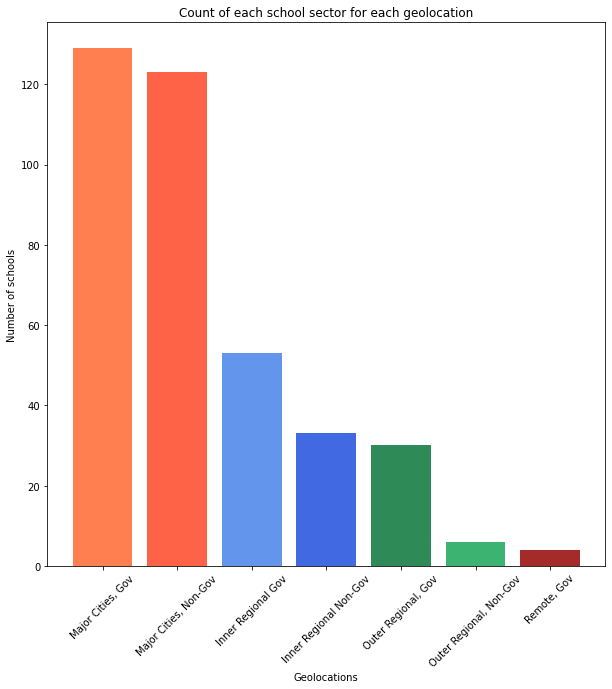

In [58]:
#Sort by school count
school_geo_sector = school_geo_sector.sort_values('School Count', ascending= False)

#label x and y axis and create size
x_axis = ['Major Cities, Gov','Major Cities, Non-Gov','Inner Regional Gov','Inner Regional Non-Gov', 'Outer Regional, Gov','Outer Regional, Non-Gov', 'Remote, Gov']
y_axis = school_geo_sector["School Count"]
plt.figure(figsize=(10,10))
#plot bar chart
plt.bar(x_axis,y_axis, color=['coral','tomato','cornflowerblue','royalblue','seagreen','mediumseagreen','brown'])
#rotate x_axis labels to prevent them being cut off from the PNG
plt.xticks(rotation=45)
#label the chart
plt.ylabel('Number of schools')
plt.xlabel('Geolocations')
plt.title('Count of each school sector for each geolocation')
#save then display
plt.savefig('output/schools_sector_count_bar.png')
plt.show()

### Total Geolocation School Sector Distribution

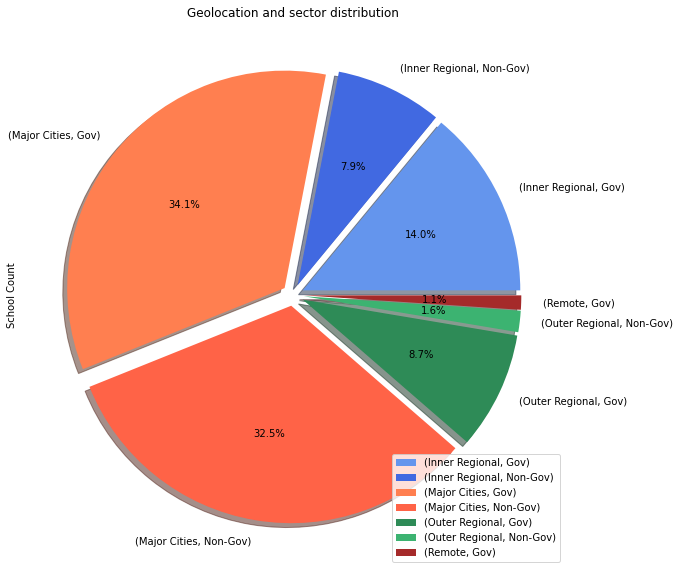

In [19]:
#Geolocation and sector distribution

#plot pie chart
school_geo_sector.plot.pie(y= 'School Count' ,figsize=(10,10), explode=(0.05, 0.05,0.05, 0.05,0.05, 0.05,0.05),
        shadow= True, autopct="%1.1f%%", colors = ['cornflowerblue','royalblue','coral','tomato','seagreen','mediumseagreen','brown'])
#move ledgend so it does not obscure text
plt.legend(loc='lower right')
plt.title('Geolocation and sector distribution')
#Save and print
plt.savefig('output/schools_sector_perc_pie.png')
plt.show()

### Each Geolocations Sector Distribution

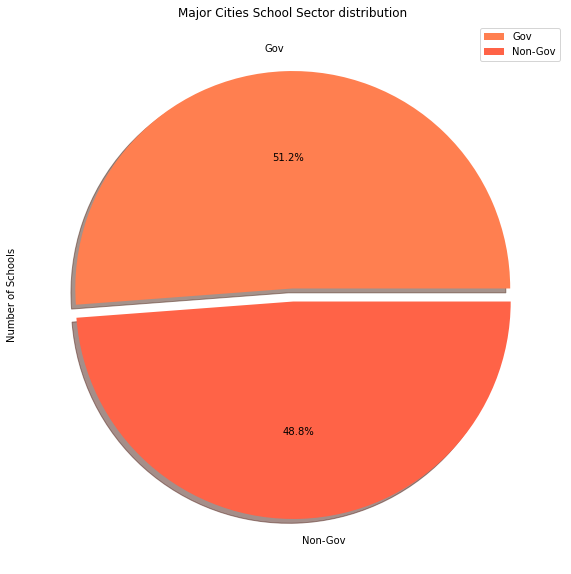

In [21]:
#Create seperate data frame
Major_Cities_data_sector = pd.DataFrame(Major_Cities_data.groupby(['Sector']).count())
#create copy of column to better label the graph
Major_Cities_data_sector['Number of Schools'] = Major_Cities_data_sector['School Name']
Major_Cities_data_sector.plot.pie(y= 'Number of Schools' ,figsize=(10,10),explode=(0.03,0.03),
        shadow= True, autopct="%1.1f%%", colors = ['coral','tomato'])
plt.title('Major Cities School Sector distribution')
#save and print
plt.savefig('output/major_cities_sector_perc_pie.png')
plt.show()

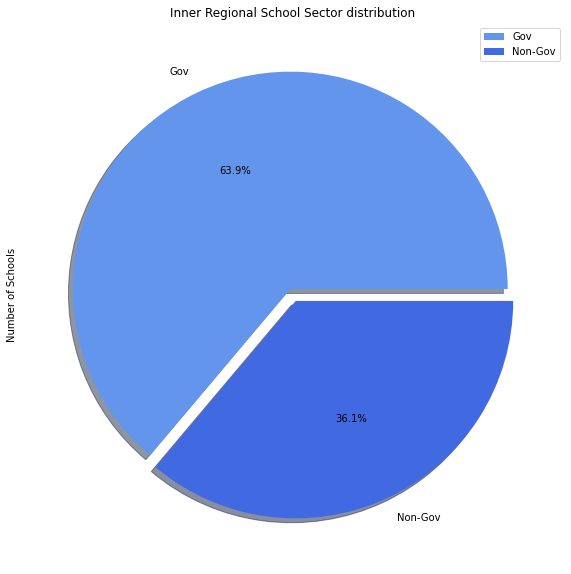

In [22]:
#create a seperate data frame for geolocation
Inner_Regional_sector = pd.DataFrame(Inner_Regional_data.groupby(['Sector']).count())
#create copy of column to better label the graph
Inner_Regional_sector['Number of Schools'] = Inner_Regional_sector['School Name']
Inner_Regional_sector.plot.pie(y= 'Number of Schools' ,figsize=(10,10),
        shadow= True, autopct="%1.1f%%",colors = ['cornflowerblue','royalblue'],explode=(0.03,0.03))
plt.title('Inner Regional School Sector distribution')
#Save and print
plt.savefig('output/inner_regional_sector_perc_pie.png')
plt.show()

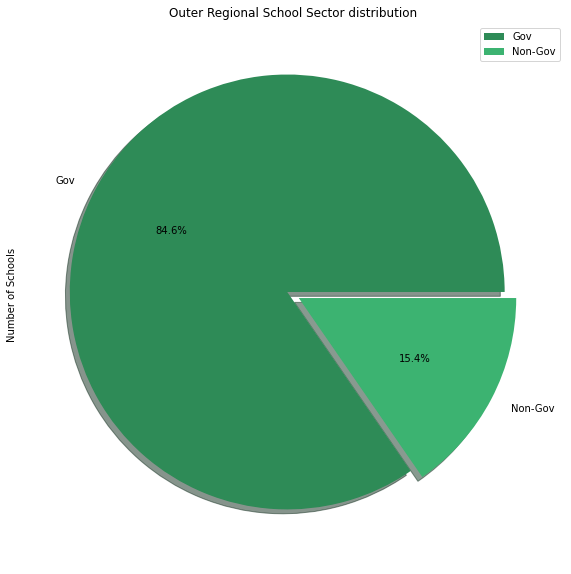

In [23]:
#create a seperate data frame for geolocation
Outer_Regional_sector = pd.DataFrame(Outer_Regional_data.groupby(['Sector']).count())
#create copy of column to better label the graph
Outer_Regional_sector['Number of Schools'] = Outer_Regional_sector['School Name']
Outer_Regional_sector.plot.pie(y= 'Number of Schools' ,figsize=(10,10),
        shadow= True, autopct="%1.1f%%", colors = ['seagreen','mediumseagreen'],explode=(0.03,0.03))
plt.title('Outer Regional School Sector distribution')
#Save and print
plt.savefig('output/outer_regional_sector_perc_pie.png')
plt.show()

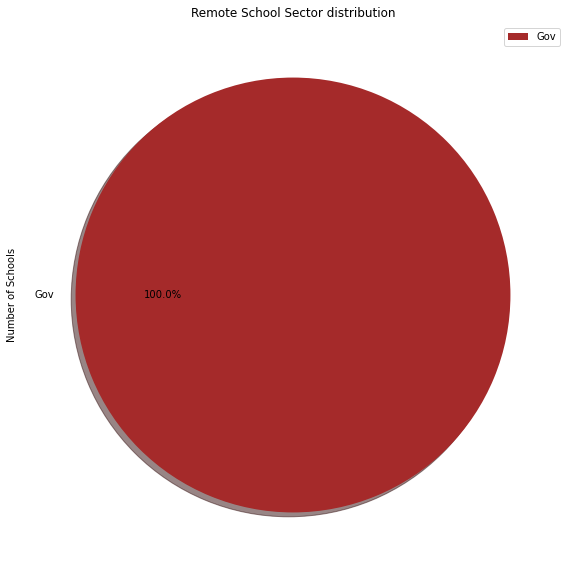

In [59]:
#create a seperate data frame for geolocation
Remote_sector = pd.DataFrame(Remote_data.groupby(['Sector']).count())
#create copy of column to better label the graph
Remote_sector['Number of Schools'] = Remote_sector['School Name']

Remote_sector.plot.pie(y= 'Number of Schools' ,figsize=(10,10),
        shadow= True, autopct="%1.1f%%", colors = ['brown'])
plt.title('Remote School Sector distribution')
#Save and print
plt.savefig('output/remote_sector_perc_pie.png')
plt.show()

# Geolocation access to different schooling sectors Conclusion
From this data set it had become clear that the percentage of non-government schools did in fact lower as the distance from major cities increased and population decreased. As there were 123 non-government schools in major cities, 30 in inner regional, 15 in outer regional and finally 0 in remote geolocations. Non-government schools also made up less percentage of school sector as the population in each geolocation lowered. In major cities it was almost half of all schools at 48%, then 36% in inner regional geolocations and 15% of outer regional with none in rural geolocations. This is most likely because it is less profitable to operate private education in less densely populated areas.
This then also gave context to our exploration of access to education and population. From this section it became clear that in fact major cities again had more access to non-government education, whereas collections with lower population have much less access of any to non government education.

# Geolocaiton and Academic Success
This section investigates if Geolocation affects academic success, by looking at three key stats. Mean VCE study score is the mean study score for each class for each school. VCE 40%+ looks at the percentage of students who had scored a VCE study score over 40% and finally the percentage of students applying for tertiary education after their highschool education. Each section uses a box plot and statistical summary to evalue how different geolocations perform academically.
* Data summaries for each geolocation
* Geolocation median ATAR box plots
* 40%+ geolocation box plots
* %tertiary education box plots
* Median VCE scores heatmap

### Data summaries for each geolocation

In [77]:
major_city_academic = pd.DataFrame(school_df.loc[(school_df['Geolocation'] == 'Major Cities')])
major_city_academic.drop(major_city_academic.columns[[5,6,7]],axis=1,inplace=True)
major_city_academic.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,252.000000,252.000000,252.000000
mean,77.710714,28.480159,7.780952
std,23.634781,6.690333,7.663461
min,0.000000,0.000000,0.000000
25%,69.150000,27.000000,2.675000
50%,85.250000,30.000000,5.300000
75%,94.200000,32.000000,10.000000
max,100.000000,37.000000,37.200000


In [78]:
inner_regional_academic = pd.DataFrame(school_df.loc[(school_df['Geolocation'] == 'Inner Regional')])
inner_regional_academic.drop(inner_regional_academic.columns[[5,6,7]],axis=1,inplace=True)
inner_regional_academic.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,83.000000,83.000000,83.000000
mean,63.740964,27.506024,3.715663
std,20.291690,4.022417,4.987533
min,0.000000,0.000000,0.000000
25%,54.900000,26.000000,0.550000
50%,65.900000,28.000000,2.000000
75%,76.600000,29.000000,5.300000
max,100.000000,37.000000,32.500000


In [79]:
outer_regional_academic = pd.DataFrame(school_df.loc[(school_df['Geolocation'] == 'Outer Regional')])
outer_regional_academic.drop(outer_regional_academic.columns[[5,6,7]],axis=1,inplace=True)
outer_regional_academic.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,39.000000,39.000000,39.000000
mean,63.528205,25.974359,4.141026
std,25.008188,7.828716,4.743900
min,0.000000,0.000000,0.000000
25%,50.000000,26.000000,0.000000
50%,63.400000,28.000000,2.600000
75%,83.300000,30.000000,6.400000
max,100.000000,33.000000,19.300000


In [80]:
remote_academic = pd.DataFrame(school_df.loc[(school_df['Geolocation'] == 'Remote')])
remote_academic.drop(remote_academic.columns[[5,6,7]],axis=1,inplace=True)
remote_academic.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,4.00000,4.000000,4.00
mean,65.77500,28.000000,0.65
std,26.02209,2.160247,1.30
min,41.70000,26.000000,0.00
25%,47.92500,26.750000,0.00
50%,60.70000,27.500000,0.00
75%,78.55000,28.750000,0.65
max,100.00000,31.000000,2.60


### Geolocation median ATAR box plots

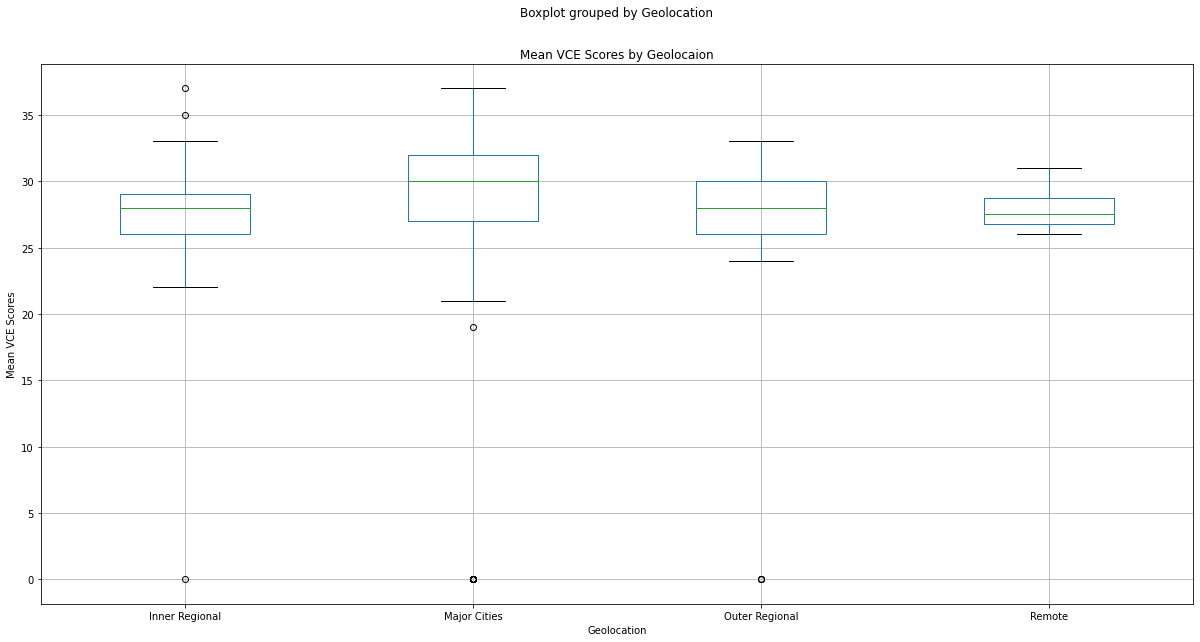

In [81]:
#remove 0's from data set
mean_vce_score = school_df.drop(school_df[school_df['Median VCE Score'] == 0].index, inplace=False)
# Create a boxplot to compare means
mean_vce_score.boxplot("Median VCE Score", by="Geolocation", figsize=(20, 10))
plt.title('Mean VCE Scores by Geolocaion')
plt.ylabel('Mean VCE Scores')

plt.savefig('output/mean_vce_box.png')

### 40%+ geolocation box plots


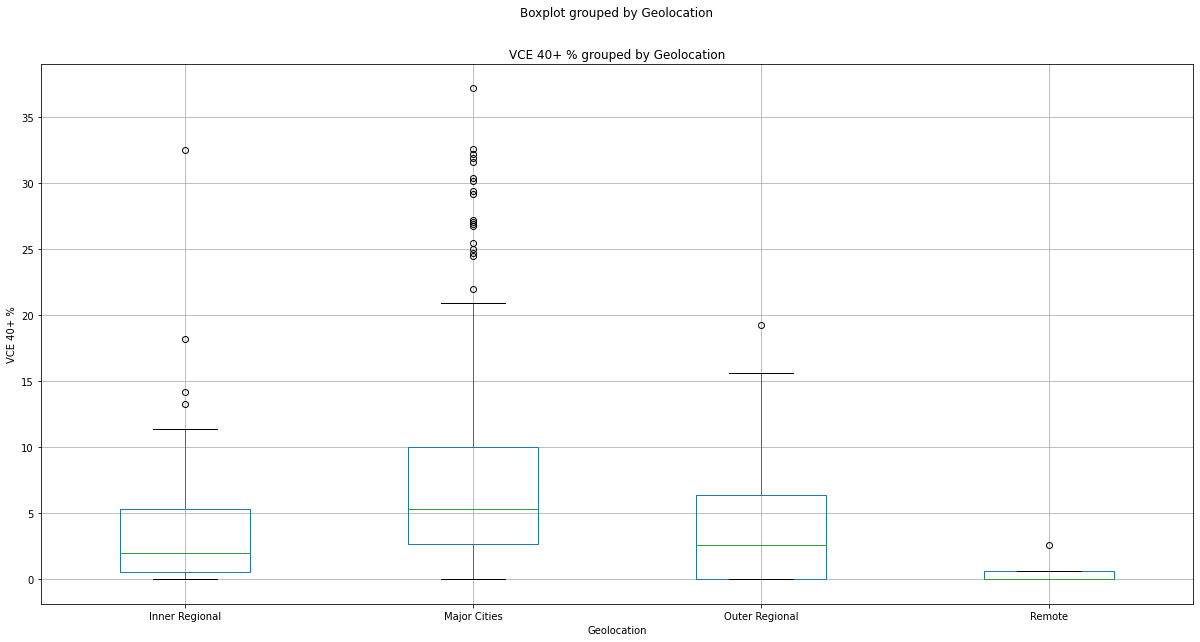

In [82]:
#remove 0's from data set
vce_40 = school_df.drop(school_df[school_df['VCE 40+ %'] == 0].index, inplace=False)
# Create a boxplot to compare means
vce_40.boxplot("VCE 40+ %", by="Geolocation", figsize=(20, 10))
plt.title('VCE 40+ % grouped by Geolocation')
plt.ylabel('VCE 40+ %')
plt.savefig('output/median_vce_box.png')

### %tertiary  education box plots

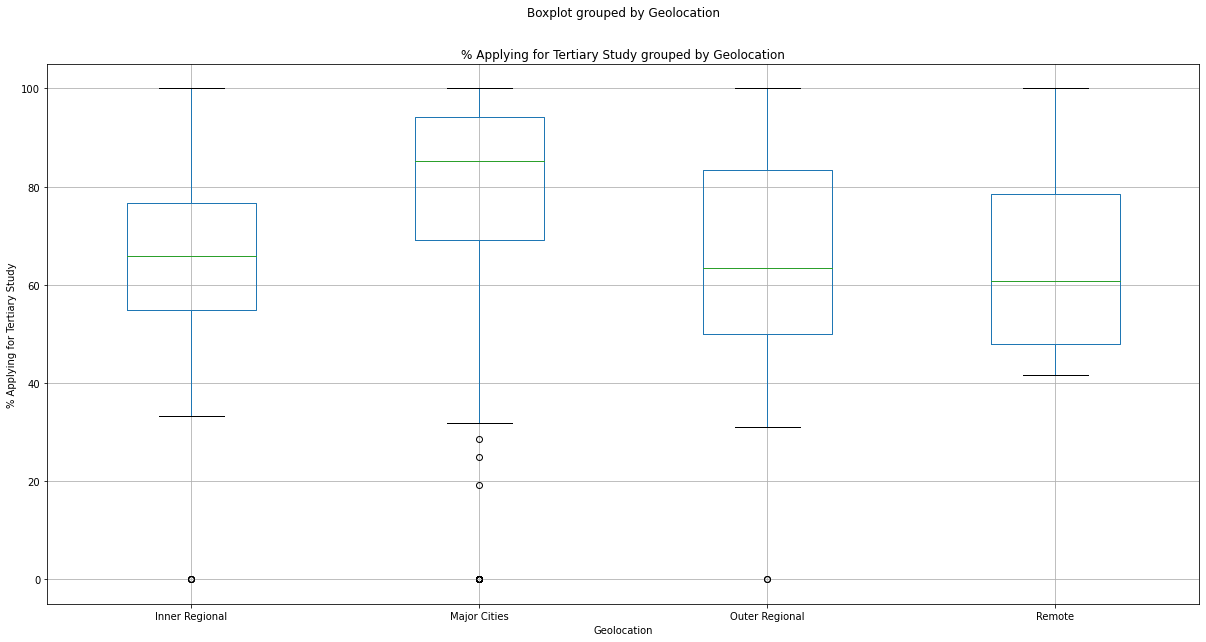

In [83]:
Tertiary = school_df.drop(school_df[school_df['% Applying for Tertiary Study'] == 0].index, inplace=False)
Tertiary.boxplot('% Applying for Tertiary Study', by="Geolocation", figsize=(20, 10))
plt.title('% Applying for Tertiary Study grouped by Geolocation')
plt.ylabel('% Applying for Tertiary Study')
plt.savefig('output/tertiary_box.png')

### Median VCE scores heatmap

In [66]:
#Median VCE Score heatmap 
locations = school_df[["Latitude", "Longitude"]].astype(float)
heatmap_layer = school_df["Median VCE Score"].astype(float)

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=heatmap_layer, 
                                 dissipating=False, max_intensity=50,
                                 point_radius = 0.1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# Geolocaiton and Academic Success Conclusion
From this section we attempted to investigate if geolocation influence academic success. 

In the mean VCE score analysis schools within major cities had performed slightly better with a higher mean result of 29.66, where the next closest was outer regional with 28.14. But schools within major cities did have the lowest scores of all geolocations (minimum of 19). And shared the highest with inner regional (maximum 37).  Overall, from this data, it became clear that there was no strong patter with mean VCE scores.
VCE scores over 40%, had some indication that major cities had somewhat performed better than the other geolocations, indicating that in fact there is some relation between academic success and geolocation. As it had the highest maximum, mean, std and upper quartiles. However, between both regional geolocations outer regional did perform better that inner regional, beside some upper outliers. And remote had performed the worst. Indicating that there is some relation between students finding high success in major cities. 

The percentage of students applying for tertiary education as for the most part fairly equal, while major cities again had a higher mean, and it had a higher lower quartile it did also contain high outliers. This section had indicated that there is not a strong relationship between geolocation and continuing education. 

The heat map of median VCE scores did also not indicate a strong bias, while there is a large amount of head from Melbourne and Geelong, there a many other spots on the heat map that are just as hot. The concentration within major cities is most likely due to the concentration of schools within the area.

Overall form this section it is difficult to assert there is a strong relationship directly between geolocation and academic results.


# Sector and Academic Sucess
This section investigates if school sector (Government and Non-Government) has an effect on the academic sucess of students. This is done by looking at three key stats. Mean VCE study score is the mean study score for each class for each school. VCE 40%+ looks at the percentage of students who had scored a VCE study score over 40% and finally the percentage of students applying for tertiary education after their highschool education. Each section uses a box plot and statistical summary to evalue how different school sectors perform academically.
* Data Frame cration
* Data summaries for each Sector
* Sector median ATAR box plots
* 40%+ geolocation box plots
* %tertiary education box plots

### Data Frame cration
Creating a dataframe that cointains the statistics that are being evaluated.

In [84]:
sectors_df = pd.DataFrame({ 'Sector': school_df['Sector'], '% Applying for Tertiary Study': school_df['% Applying for Tertiary Study'],
                            'Median VCE Score': school_df['Median VCE Score'], 'VCE 40+ %': school_df['VCE 40+ %']})
#sectors_df = sectors_df.drop(sectors_df[sectors_df['Median VCE Score'] == 0].index, inplace=False)
#sectors_df = sectors_df.drop(sectors_df[sectors_df['VCE 40+ %'] == 0].index, inplace=False)
sectors_df = sectors_df.drop(sectors_df[sectors_df['% Applying for Tertiary Study'] == 0].index, inplace=False)

### Data summaries for each Sector

In [85]:
sector_gov = sectors_df.drop(sectors_df[sectors_df['Sector'] == 'Non-Gov'].index, inplace=False)
sector_gov.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,206.000000,206.000000,206.000000
mean,70.745631,27.524272,4.141748
std,17.689828,3.734727,4.611841
min,28.600000,0.000000,0.000000
25%,58.375000,26.000000,0.925000
50%,70.250000,28.000000,2.800000
75%,85.275000,29.000000,6.250000
max,100.000000,36.000000,30.200000


In [86]:
sector_nongov = sectors_df.drop(sectors_df[sectors_df['Sector'] == 'Gov'].index, inplace=False)
sector_nongov.describe()

,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
count,154.00000,154.000000,154.000000
mean,84.67987,30.681818,9.990909
std,14.91966,3.251354,8.350863
min,19.20000,19.000000,0.000000
25%,76.72500,28.000000,4.200000
50%,89.55000,31.000000,6.550000
75%,95.97500,33.000000,14.100000
max,100.00000,37.000000,37.200000


### Sector median ATAR box plots


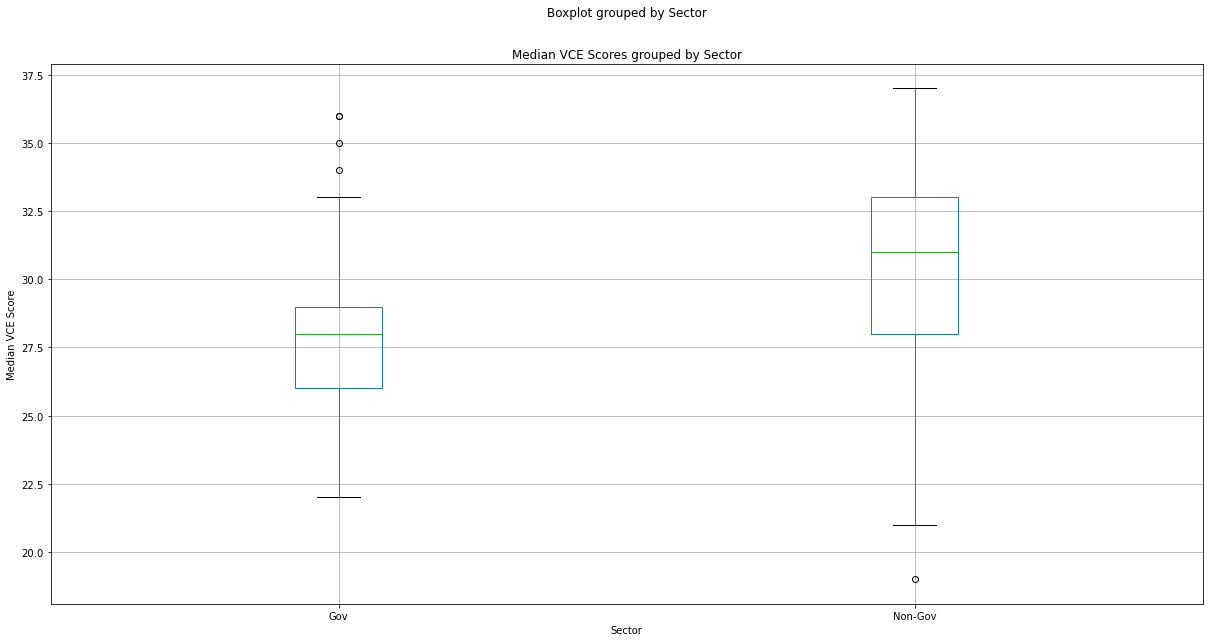

In [92]:
sector_mean = sectors_df.drop(sectors_df[sectors_df['Median VCE Score'] == 0].index, inplace=False)
# Create a boxplot to compare means
sector_mean.boxplot("Median VCE Score", by="Sector", figsize=(20, 10))
plt.title('Median VCE Scores grouped by Sector')
plt.ylabel('Median VCE Score')
plt.savefig('output/sector_mean_vce_box.png')

### 40%+ geolocation box plots

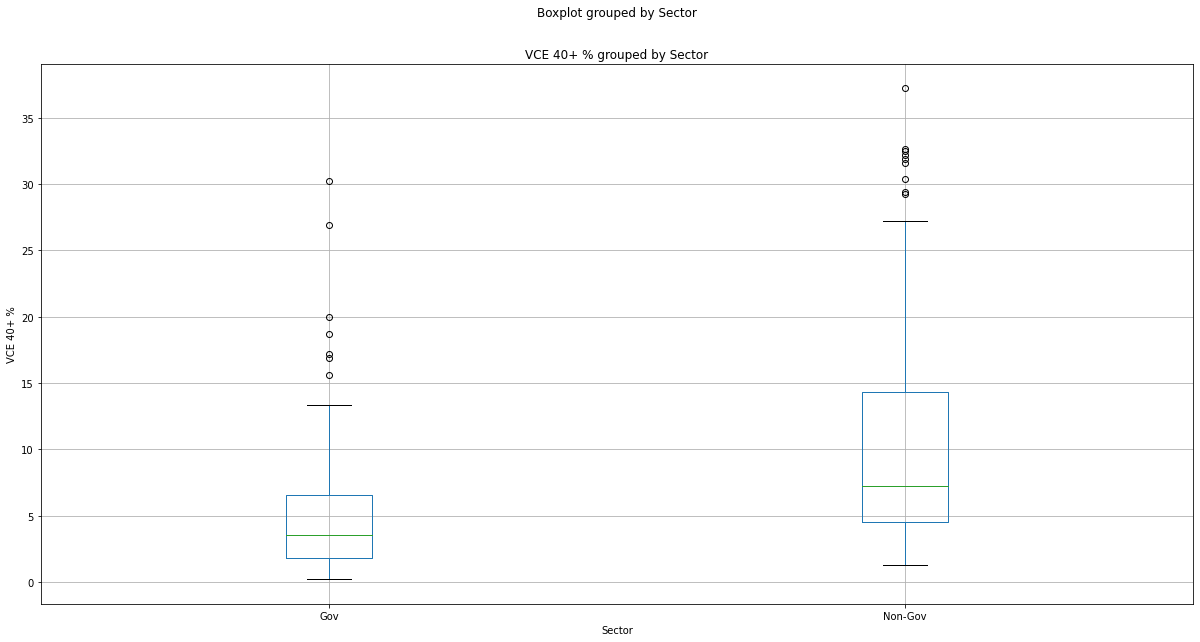

In [90]:
#remove 0's from data set
sector_mean = sectors_df.drop(sectors_df[sectors_df['VCE 40+ %'] == 0].index, inplace=False)
sector_mean.boxplot("VCE 40+ %", by="Sector", figsize=(20, 10))
plt.title('VCE 40+ % grouped by Sector')
plt.ylabel('VCE 40+ %')
plt.savefig('output/sector_median_vce_box.png')

### %tertiary education box plots

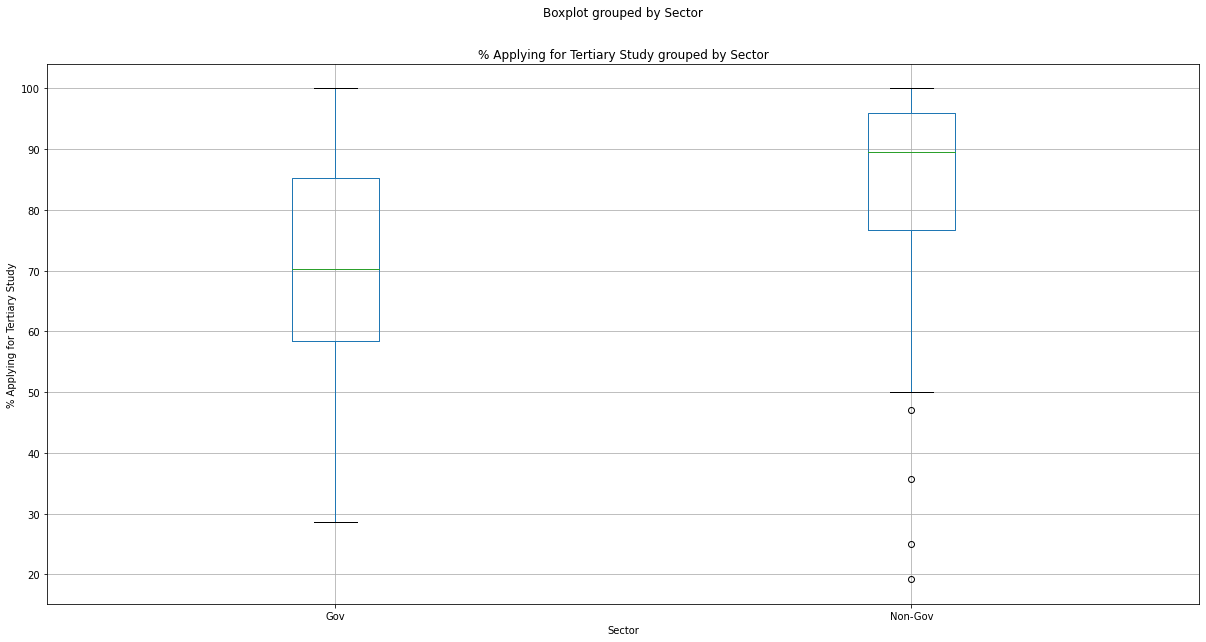

In [91]:
sector_tertiary = sectors_df.drop(sectors_df[sectors_df['% Applying for Tertiary Study'] == 0].index, inplace=False)
sector_tertiary.boxplot('% Applying for Tertiary Study', by="Sector", figsize=(20, 10))
plt.title('% Applying for Tertiary Study grouped by Sector')
plt.ylabel('% Applying for Tertiary Study')
plt.savefig('output/sector_tertiary_box.png')

# Sector and Academic Sucess Conclusion
From this section we attempted to investigate if school sector has an influence on academic success. 

From the data it became clear that in fact sector influences academic success. In mean VCE scores when null values are removed non-government schools did in fact have a mean, and a higher upper quartile. But the lower quartile was lower than government school’s lower quartile. Showing there is more variance in non-government schools median VCE scores. But is skewed higher than government schools.

In percentage of VCE score over 40% when all null values were removed non-government schools performed much higher than government schools with a significantly higher mean and upper and lower quartiles. Showing that non-government schools have a much higher percentage of highly successful students than government schools.

Non-government schools also had significantly higher applying for tertiary studies compared to government schools when null values were removed. Showing that from non-government schools students engage much more with higher learning.

This investigation had shown that non-government schools have a higher chance of performing significantly higher than government schools. However, government schools on average did perform more consistently with academic results.


# Distance From Melborune and Academic Sucess
As the project progressed we wanted to evaluate if there is any connection with the distance from the middle of Melbourne and academic sucess. Instead of using geolocation as a method for measurement. To do this we plotted each academic success measurement and compared it to the distance from the centre of Melbourne.

### Distance and Median VCE Score

The r-squared is: 0.06635315596301829


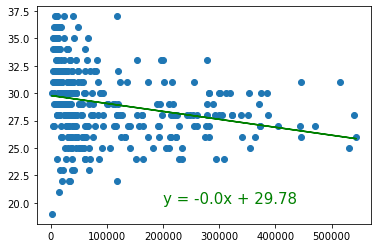

In [40]:
dist_atar = school_dis_df.drop(school_dis_df[school_dis_df['Median VCE Score'] == 0].index, inplace=False)

x_values = dist_atar['Dist From Melbourne Centre (m)']
y_values = dist_atar['Median VCE Score']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(200000,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")

### Distance and VCE score of 40% and above

The r-squared is: 0.05099029464643609


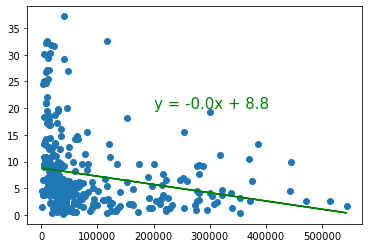

In [41]:
dist_atar = school_dis_df.drop(school_dis_df[school_dis_df['VCE 40+ %'] == 0].index, inplace=False)

x_values = dist_atar['Dist From Melbourne Centre (m)']
y_values = dist_atar['VCE 40+ %']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(200000,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")

These graphs indicate there is no necessarily a direct corrilation between the distance from the center of melbourne and VCE scores over 40% or the median ATAR values.

### Distance and % applying for Tertiary Study

The r-squared is: 0.15106850293974713


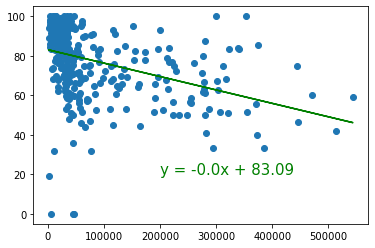

In [42]:
dist_atar = dist_atar.drop(dist_atar[dist_atar['Dist From Melbourne Centre (m)'] == 0].index, inplace=False)
x_values = dist_atar['Dist From Melbourne Centre (m)']
y_values = dist_atar['% Applying for Tertiary Study']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(200000,20),fontsize=15,color="green")
print(f"The r-squared is: {rvalue**2}")

# Distance From Melborune and Academic Sucess Conclusion
The data from this section had indicated little to no linear relation between academic performance and distance from the centre of Melbourne. For all three measurements of median VCE score (r-squared 0.07), percentage of students above 40% (r-squared 0.05) and percentage of students applying for tertiary study (r-squared 0.15).  All r-squared values were very low.

### Conclusion
Our hypotheses that ‘Students that are within major cities such as Melbourne or Geelong, that also receive Private, non-government education are more likely to have higher academic performance within Victoria.’. Has strong evidence that confirms that students from major cities that also receive a non-government education have a better chance in receiving better academic results. This is because students from major cities have the best access to non-government education s it makes up 48% of all schools within major cities. And non-government schools have the highest rate of students achieving a study score over 40%. 
However, there is not a strong indication that students from major cities perform consistently better academically than inner regional, outer regional or remote schools. Government schools on average do perform slightly worse than non-government schools but have more consistent results. Meaning there is some correlation between academic success and geolocation however it is not particularly strong.
Thus, answering our questions, we sought out at the beginning:
* Is there a relationship with Geolocation and academic success?  
No, No geolocation performs significantly better than any other geolocation.
* Is there a relationship with Geolocation and the choices of schools?
Yes, major cities have a significantly higher number of schools both government and non-government. Meaning major cities have the highest amount of choice for schools. Followed inner regional then outer regional and finally remote.
* Which school sector has best chance of success?
Non-government schools have the best chances of success, and on average perform better than government schools but are less consistent compared to government schools.

